The packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

Locate the file and read the file

In [2]:
file_path = "..\dataset\symptoSense.csv"
df = pd.read_csv(file_path)

In [3]:
le = LabelEncoder()
df['prognosis'] = le.fit_transform(df['prognosis'])

In [4]:
X = df.drop('prognosis', axis=1)
Y = df['prognosis']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [7]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [8]:
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train_pca shape: (5432, 15)
Y_train shape: (5432,)


In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=X_train_pca.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(len(np.unique(Y)), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(X_train_pca, Y_train, epochs=200, batch_size=32, validation_data=[X_test_pca, Y_test])

Epoch 1/200
170/170 [==============================] - 1s 2ms/step - loss: 5.1838 - accuracy: 0.0661 - val_loss: 3.2416 - val_accuracy: 0.2194
Epoch 2/200
170/170 [==============================] - 0s 2ms/step - loss: 2.3502 - accuracy: 0.3776 - val_loss: 1.8200 - val_accuracy: 0.4963
Epoch 3/200
170/170 [==============================] - 0s 2ms/step - loss: 1.5192 - accuracy: 0.5639 - val_loss: 1.3517 - val_accuracy: 0.6046
Epoch 4/200
170/170 [==============================] - 0s 2ms/step - loss: 1.1501 - accuracy: 0.6583 - val_loss: 1.1423 - val_accuracy: 0.6465
Epoch 5/200
170/170 [==============================] - 0s 2ms/step - loss: 0.9486 - accuracy: 0.7036 - val_loss: 0.9902 - val_accuracy: 0.6848
Epoch 6/200
170/170 [==============================] - 0s 2ms/step - loss: 0.8056 - accuracy: 0.7436 - val_loss: 0.9158 - val_accuracy: 0.6988
Epoch 7/200
170/170 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.7802 - val_loss: 0.9057 - val_accuracy: 0.7158

In [11]:
loss, accuracy = model.evaluate(X_test_pca, Y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

43/43 [==============================] - 0s 857us/step - loss: 1.1495 - accuracy: 0.8218
Test Accuracy: 82.18%


In [12]:
y_pred = model.predict(X_test_pca)
y_pred_classes = y_pred.argmax(axis=1)

43/43 [==============================] - 0s 643us/step


In [13]:
conf_matrix = confusion_matrix(Y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [14]:
class_report = classification_report(Y_test, y_pred_classes, labels=np.unique(Y_test), target_names=[str(i) for i in np.unique(Y_test)])
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       1.00      0.33      0.50         3
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         1
           9       0.29      1.00      0.44         2
          10       1.00      1.00      1.00         1
          12       0.60      1.00      0.75         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.80      1.00      0.89         4
          18       0.33      1.00      0.50         1
   

c:\Users\navne\My_Files\Navneeth_Codes\symptosense\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\navne\My_Files\Navneeth_Codes\symptosense\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\navne\My_Files\Navneeth_Codes\symptosense\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [15]:
y_pred_labels = le.inverse_transform(y_pred_classes)

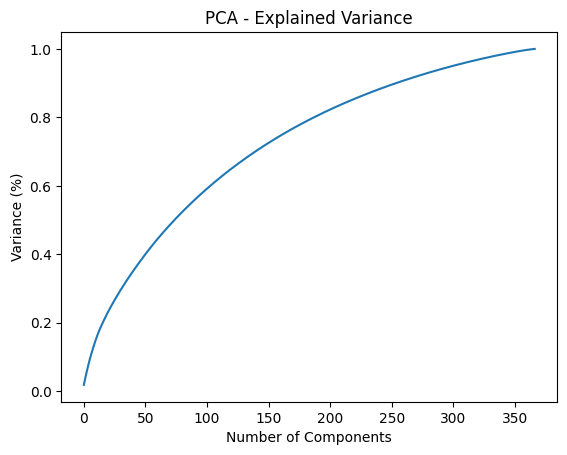

In [16]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('PCA - Explained Variance')
plt.show()

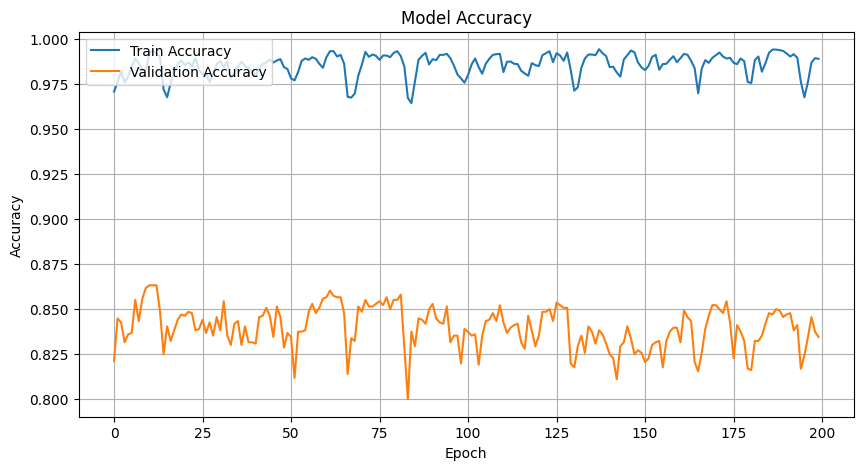

In [19]:
# Plotting Accuracy and Loss Curves
history = model.fit(X_train_pca, Y_train, epochs=200, batch_size=32, validation_data=[X_test_pca, Y_test], verbose=0)

# Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

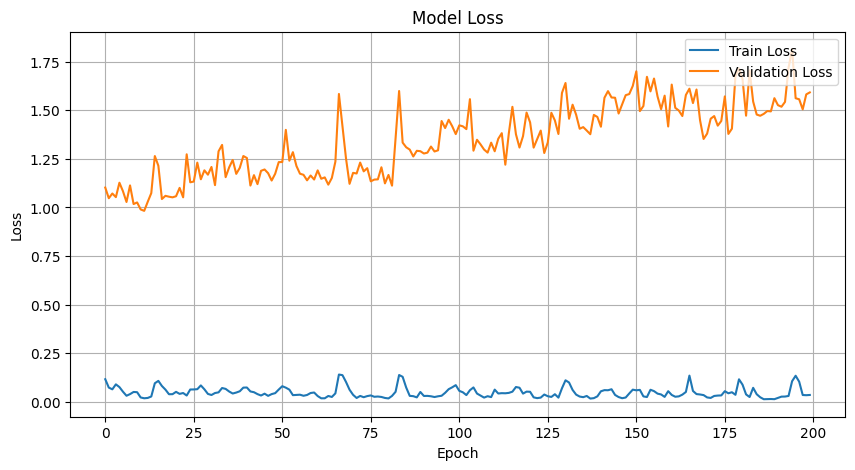

In [20]:
# Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid()
plt.show()

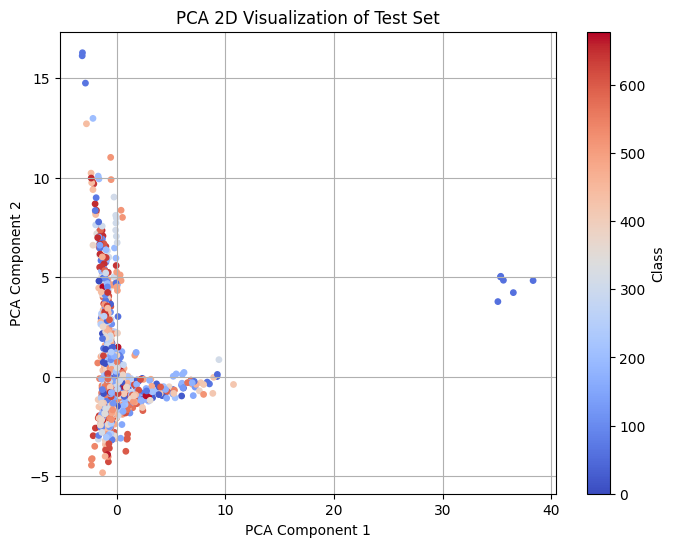

In [21]:
# PCA Visualization
# Visualizing first two PCA components of the test set
pca_2d = PCA(n_components=2)
X_test_pca_2d = pca_2d.fit_transform(X_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca_2d[:, 0], X_test_pca_2d[:, 1], c=Y_test, cmap='coolwarm', s=15)
plt.title('PCA 2D Visualization of Test Set')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label="Class")
plt.grid()
plt.show()